In [1]:
import numpy as np
import pandas as pd

In [2]:
def read_and_sort(path) -> pd.DataFrame:
    df = pd.read_csv(path, sep=',')
    df = df.sort_values(by='Score')
    return df

In [3]:
# load docking_results.csv
df_adomet_pocket = read_and_sort('adomet_pocket/docking_results.csv')
df_trna_pocket = read_and_sort('trna_pocket/docking_results.csv')
df_dimer_pocket = read_and_sort('dimer_pocket/docking_results.csv')

In [4]:
# print the top 10 rows of each dataframe
# create one big table so that we can compare the results
# i dont care about concatenating the dataframes so that the rows are aligned (i just want to paste the tables next to each other)
# and hide the index
df = pd.concat([df.head(20).reset_index(drop=True) for df in [df_adomet_pocket, df_trna_pocket, df_dimer_pocket]], axis=1)
df.columns = ['AdoMet Pocket', 'Score', 'tRNA Pocket', 'Score', 'Dimer Pocket', 'Score']
df

,AdoMet Pocket,Score,tRNA Pocket,Score,Dimer Pocket,Score
0,CHEMBL2105745_preprocessed_conf6_out.sdf,-8.304,CHEMBL383675_preprocessed_conf1_out.sdf,-5.983,CHEMBL1200636_preprocessed_conf5_out.sdf,-6.433
1,CHEMBL1983268_preprocessed_conf3_out.sdf,-7.935,CHEMBL383675_preprocessed_conf8_out.sdf,-5.955,CHEMBL1200636_preprocessed_conf0_out.sdf,-6.432
2,CHEMBL571546_preprocessed_conf7_out.sdf,-7.722,CHEMBL383675_preprocessed_conf7_out.sdf,-5.929,CHEMBL669_preprocessed_conf4_out.sdf,-6.325
3,CHEMBL83668_preprocessed_conf3_out.sdf,-7.697,CHEMBL608533_preprocessed_conf5_out.sdf,-5.847,CHEMBL1716_preprocessed_conf5_out.sdf,-6.318
4,CHEMBL83668_preprocessed_conf8_out.sdf,-7.638,CHEMBL3989694_preprocessed_conf1_out.sdf,-5.847,CHEMBL1716_preprocessed_conf9_out.sdf,-6.313
5,CHEMBL83668_preprocessed_conf0_out.sdf,-7.636,CHEMBL1599768_preprocessed_conf8_out.sdf,-5.786,CHEMBL1716_preprocessed_conf8_out.sdf,-6.313
6,CHEMBL1983268_preprocessed_conf9_out.sdf,-7.494,CHEMBL3039596_preprocessed_conf6_out.sdf,-5.782,CHEMBL1716_preprocessed_conf1_out.sdf,-6.313
7,CHEMBL1257015_preprocessed_conf1_out.sdf,-7.486,CHEMBL383675_preprocessed_conf9_out.sdf,-5.772,CHEMBL1716_preprocessed_conf7_out.sdf,-6.312
8,CHEMBL3989866_preprocessed_conf4_out.sdf,-7.450,CHEMBL3991065_preprocessed_conf7_out.sdf,-5.674,CHEMBL1716_preprocessed_conf3_out.sdf,-6.312
9,CHEMBL2103870_preprocessed_conf1_out.sdf,-7.446,CHEMBL1646_preprocessed_conf2_out.sdf,-5.668,CHEMBL516_preprocessed_conf2_out.sdf,-6.283


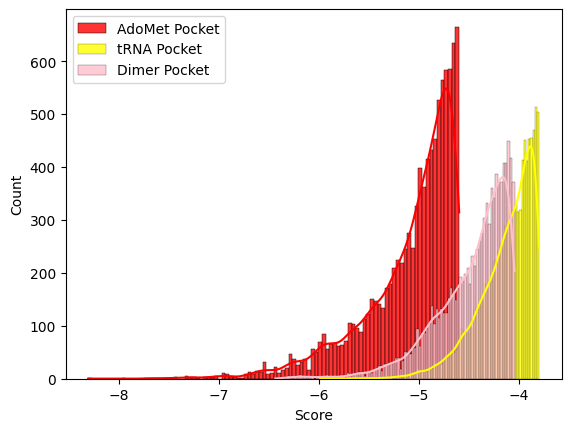

<Figure size 640x480 with 0 Axes>

In [18]:
# for each of the 3 dataframes, do a histogram of the scores
import seaborn as sns
import matplotlib.pyplot as plt

# Take the top 1000 scores from each dataframe
top_n = 10000
df_adomet_sample = df_adomet_pocket.nsmallest(top_n, 'Score')
df_trna_sample = df_trna_pocket.nsmallest(top_n, 'Score')
df_dimer_sample = df_dimer_pocket.nsmallest(top_n, 'Score')

# Create histograms
fig, ax = plt.subplots()
sns.histplot(df_adomet_sample['Score'], ax=ax, color='red', alpha=0.8, label='AdoMet Pocket', bins=100, kde=True)
sns.histplot(df_trna_sample['Score'], ax=ax, color='yellow', alpha=0.8, label='tRNA Pocket', bins=100, kde=True)
sns.histplot(df_dimer_sample['Score'], ax=ax, color='pink', alpha=0.8, label='Dimer Pocket', bins=100, kde=True)

# Add a legend and show the plot
ax.legend(loc = 'upper left')

plt.show()
plt.savefig('histogram.png')


In [19]:
# view the best scoring ligand for each pocket in pymol in jupyter notebook (with py3dmol)
# view all three ligands in one interactive view (since they are all ligands for the same structure)
# visualize the protein structure as well
import py3Dmol
RENDER = False

# read the best scoring ligand name for each pocket (first in each dataframe)
df_adomet_best = df_adomet_pocket.iloc[0]['Ligand']
df_trna_best = df_trna_pocket.iloc[0]['Ligand']
df_dimer_best = df_dimer_pocket.iloc[0]['Ligand']

# Paths to the protein structure and best ligands
protein_path = '../Structure/TrmD/raw_4yvg.pdbqt'
ligand_adomet_path = f"./adomet_pocket/{df_adomet_best.split('_')[0]}/out/{df_adomet_best}"
ligand_trna_path = f"./trna_pocket/{df_trna_best.split('_')[0]}/out/{df_trna_best}"
ligand_dimer_path = f"./dimer_pocket/{df_dimer_best.split('_')[0]}/out/{df_dimer_best}"


print(f"Best ligand for AdoMet pocket: {df_adomet_best}")
print(f"Best ligand for tRNA pocket: {df_trna_best}")
print(f"Best ligand for Dimer pocket: {df_dimer_best}")
def visualize_structure_with_surface():
    view = py3Dmol.view(width=800, height=600)
    
    # Load the protein structure
    with open(protein_path, 'r') as file:
        protein_model = file.read()
        view.addModel(protein_model, 'pdbqt')
    
    # Add a transparent surface representation (not a cartoon) 
    view.setStyle({'cartoon': {'color': "black" }})  
    view.addSurface(py3Dmol.VDW, {'opacity': 0.9, 'color': 'white'})  # Transparent white surface
    

    ligand_paths = [ligand_adomet_path, ligand_trna_path, ligand_dimer_path]
    ligand_colors = ['orange', 'cyan', 'green']
    ligand_labels = ['SAM Pocket', 'tRNA Pocket', 'Dimer Pocket']
    # Add the ligands
    for path, color, label in zip(ligand_paths, ligand_colors, ligand_labels):
        with open(path, 'r') as f:
            view.addModel(f.read(), 'sdf')
        # Last model is the newly added ligand (-1)
        view.setStyle({'model': -1}, {'stick': {'colorscheme': f'{color}Carbon'}})

        # Show residues within 4 Å of this ligand in stick representation
        


    

    # Zoom to the entire structure
    view.zoomTo()
    
    # Show the viewer
    return view

# Call the visualization function
structure = visualize_structure_with_surface()

# save the visualization to a file
structure.show()

if RENDER:
    structure.render_image()
    structure.download_image('structure.png')

Best ligand for AdoMet pocket: CHEMBL2105745_preprocessed_conf6_out.sdf
Best ligand for tRNA pocket: CHEMBL383675_preprocessed_conf1_out.sdf
Best ligand for Dimer pocket: CHEMBL1200636_preprocessed_conf5_out.sdf


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
# We have rows with the same ligand, but different conformations
# We want the average score for each ligand
# We can use the groupby method to group by the ligand column
# CHEMBL3833409_preprocessed_confX_out.sdf
def average_score_per_ligand(df) -> pd.DataFrame:
    df = df.copy()
    df['Ligand'] = df['Ligand'].str.split('_').str[0]
    df = df.groupby('Ligand').mean()
    df = df.sort_values(by='Score')
    return df

df_lig_sorted_adomet = average_score_per_ligand(df_adomet_pocket)
df_lig_sorted_trna = average_score_per_ligand(df_trna_pocket)
df_lig_sorted_dimer = average_score_per_ligand(df_dimer_pocket)

df_lig_sorted = pd.concat([df.head(20).reset_index(drop=False) for df in [df_lig_sorted_adomet, df_lig_sorted_trna, df_lig_sorted_dimer]], axis=1)
df_lig_sorted.columns = ['AdoMet Pocket', 'Score', 'tRNA Pocket', 'Score', 'Dimer Pocket', 'Score']
df_lig_sorted

,AdoMet Pocket,Score,tRNA Pocket,Score,Dimer Pocket,Score
0,CHEMBL55400,-6.9258,CHEMBL383675,-5.5757,CHEMBL1716,-6.2616
1,CHEMBL1201050,-6.5339,CHEMBL608533,-4.8751,CHEMBL516,-6.1674
2,CHEMBL711,-6.4448,CHEMBL354541,-4.8378,CHEMBL1200332,-6.0075
3,CHEMBL6466,-6.4370,CHEMBL3991065,-4.8030,CHEMBL669,-5.9564
4,CHEMBL1201198,-6.3887,CHEMBL1017,-4.7957,CHEMBL668,-5.9164
5,CHEMBL1201260,-6.3713,CHEMBL1755,-4.7824,CHEMBL1200636,-5.8971
6,CHEMBL1243,-6.3428,CHEMBL21333,-4.7364,CHEMBL1201156,-5.6450
7,CHEMBL1201104,-6.3104,CHEMBL3402762,-4.7191,CHEMBL108,-5.5955
8,CHEMBL46469,-6.2826,CHEMBL1868702,-4.7164,CHEMBL946,-5.5164
9,CHEMBL625,-6.2681,CHEMBL1201740,-4.6855,CHEMBL629,-5.4648


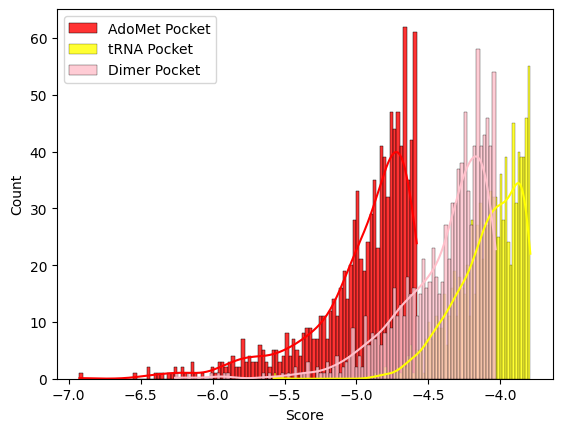

In [8]:
# Get only a sample of the top 1000 ligands (smallest)
top_n = 1000
df_lig_sorted_adomet_sample = df_lig_sorted_adomet.nsmallest(top_n, 'Score')
df_lig_sorted_trna_sample = df_lig_sorted_trna.nsmallest(top_n, 'Score')
df_lig_sorted_dimer_sample = df_lig_sorted_dimer.nsmallest(top_n, 'Score')

# Create histograms
fig, ax = plt.subplots()
sns.histplot(df_lig_sorted_adomet_sample['Score'], ax=ax, color='red', alpha=0.8, label='AdoMet Pocket', bins=100, kde=True)
sns.histplot(df_lig_sorted_trna_sample['Score'], ax=ax, color='yellow', alpha=0.8, label='tRNA Pocket', bins=100, kde=True)
sns.histplot(df_lig_sorted_dimer_sample['Score'], ax=ax, color='pink', alpha=0.8, label='Dimer Pocket', bins=100, kde=True)

# Add a legend and show the plot
ax.legend()
plt.show()